<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Example-fitting-L+C//R" data-toc-modified-id="Example-fitting-L+C//R-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Example fitting L+C//R</a></span></li><li><span><a href="#Example-fit-inductors-Rdc+L//Rproximity//Cp" data-toc-modified-id="Example-fit-inductors-Rdc+L//Rproximity//Cp-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Example fit inductors Rdc+L//Rproximity//Cp</a></span></li></ul></div>

In [1]:
%load_ext autoreload
%autoreload 2

import sys
from pathlib import Path
import numpy as np

import pandas as pd
import zfit_modelcore_cli as zfitcli
from zfit_helpers_plot import LogLogPlotDualAxisPlotly

The following code is used adapting the python script Zfit2.0, tuning it to be possible to call it from CLI (command line interface) and from python notebook to be launched also online platform. the following code line permit to run the original code available at https://exality.com/fitting-equivalent-circuits-to-impedance-data/

In [2]:
#!python Zfit.pyw

# Example fitting L+C//R
this example is useful in power electronic because is the typical output stage for a buck DC/DC stage. Measuring it between the swithing node and GND, then they can be compare with the theoretical values and verify if there are discrepancies due to manufacturing.

In [3]:
# Test case
# DESCRIPTION: load example Zfit
# EXPECTED RESULT: fitting correct in plotly
filename_choke=r"./TestDataFiles/Sample ls(cpr).csv"
df_LCR = pd.read_csv(filename_choke)
df_LCR.columns

Index(['FREQUENCY [Hz]', 'MAG [Ω]', 'PHASE [deg]'], dtype='object')

In [4]:
range = zfitcli.Range()
ya = zfitcli.YAxes(2)

range.xa['Hz'] = df_LCR['FREQUENCY [Hz]']
ya.inputData[0] = df_LCR['MAG [Ω]']
ya.inputData[1] = df_LCR['PHASE [deg]']

my_model = zfitcli.DoModel()
fit_model = zfitcli.import_module("Models." + "ls(cpr)")
my_model.do_model_cli(range=range, ya=ya, model=fit_model)

Ls, 7.676574111484213e-08
Cp, 9.744783995233943e-10
Rp, 194.79817132664598
Number of function calls: 35


In [5]:
newplot=LogLogPlotDualAxisPlotly()
newplot.add_trace(f=df_LCR['FREQUENCY [Hz]'], zabs=df_LCR['MAG [Ω]'], zdeg=df_LCR['PHASE [deg]'], label="Sample ls(cpr)")
newplot.add_trace(f=df_LCR['FREQUENCY [Hz]'], zabs=my_model.ya.modeledData[0], zdeg=my_model.ya.modeledData[1], label="FIT Sample ls(cpr)")
newplot.show()

# Example fit inductors Rdc+L//Rproximity//Cp
This is the typical fitting necessary with any power inductor, the 4 values are:

1. RDC fits the DC losses, this can be measured to with a normal 4W method or letting flow some DC current and measuring the voltage across the choke

2. Rproximity is a resistance placed in the electrical model in parallel to the inductance to model the AC losses due to proximity effect, this is because the losses raise with f^2

3. L is the inductance measured at low frequency (this value reduce if the frequency increases due to the eddy currents)

4. C is the equivalent total capacitance seen at the terminal (this include intra-winding and terminal capacitance)

In the next section we will fit the measuremenst from a inverter inductor of Sirio SRL 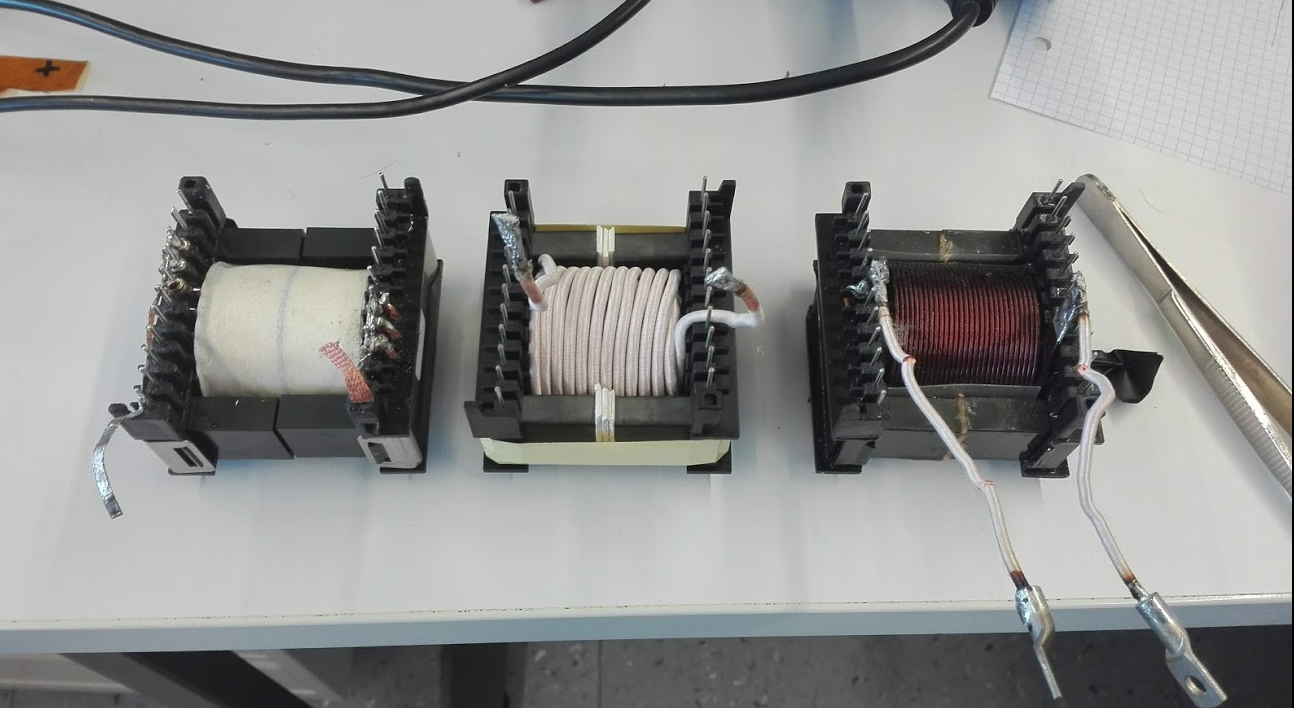

In [6]:
# Test case
# DESCRIPTION: load coilcraft inductors and calc loss factor at different frequencies
# EXPECTED RESULT: new excel file with the same db and loss factor

filename_choke_sirio=r"./TestDataFiles/Inductor2.xls"
sheetname_choke_sirio="sirio"

# df_sirio = pd.read_excel(io=filename_choke, sheet_name=sheetname_choke_sirio)
df_sirio = pd.read_excel(io=filename_choke_sirio, sheet_name=sheetname_choke_sirio)
df_sirio.columns

Index(['Frequency (Hz)', 'Inductance (H)', 'Resistance (O)'], dtype='object')

In [7]:
#R+j*X
f = df_sirio['Frequency (Hz)']
L = df_sirio['Inductance (H)']   
R = df_sirio['Resistance (O)']

# we calc complex impedance abs(Z)*exp(j*deg)
Zabs_sirio = np.abs(R+1j*2*np.pi*f*L)
Zdeg_sirio = np.angle(R+1j*2*np.pi*f*L)

In [8]:
range.xa['Hz'] = f
ya.inputData[0] = Zabs_sirio
ya.inputData[1] = Zdeg_sirio

my_model = zfitcli.DoModel()
fit_model = zfitcli.import_module("Models." + "rpcpl")
my_model.do_model_cli(range=range, ya=ya, model=fit_model)

R, 9108.42301217358
C, 2.5235270544381366e-11
L, 0.00015606072332020876
Number of function calls: 53


In [9]:
newplot=LogLogPlotDualAxisPlotly()
newplot.add_trace(f=f, zabs=Zabs_sirio, zdeg=Zdeg_sirio*180/np.pi, label="SirioInductors")
newplot.add_trace(f=f, zabs=my_model.ya.modeledData[0], zdeg=my_model.ya.modeledData[1], label="FIT_SirioInductors")
newplot.show()

# Fitting of different inductors
webinar from Omicron on 2020.07.27 
for more details: https://www.youtube.com/watch?v=T2OqewIUL3M&list=PLE3Pq-hBtiMRyV62bv2_UoKQ-YofQI5IB&index=4
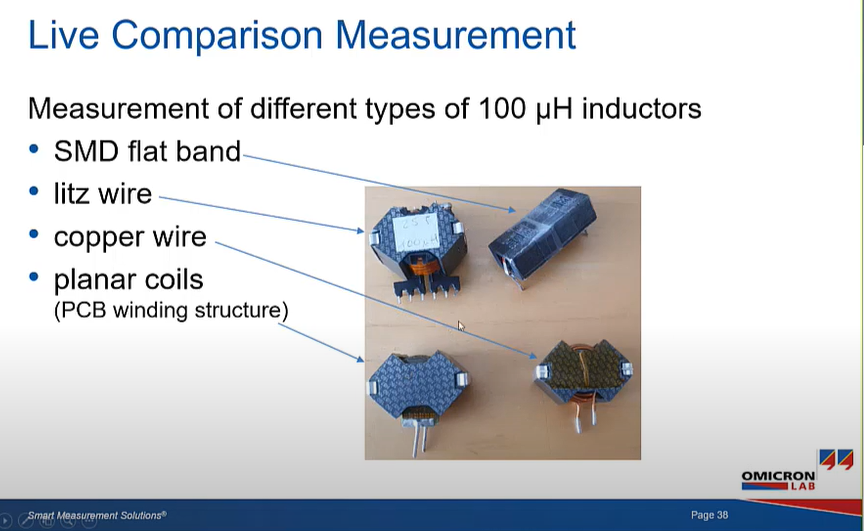

In [10]:
filename_chokes_webinar=r"./TestDataFiles/Inductors_2020-07-27T09_29_28.xlsx"
# df_sirio = pd.read_excel(io=filename_choke, sheet_name=sheetname_choke_sirio)
df_chokes = pd.read_excel(io=filename_chokes_webinar)
df_chokes.columns

Index(['Frequency (Hz)', 'Unnamed: 1', 'FlatBandWire: Frequency (Hz)',
       'FlatBandWire: Trace 1: Magnitude (Ω)',
       'FlatBandWire: Trace 2: Phase (°)', 'Unnamed: 5',
       'PCB LitzEmulation: Frequency (Hz)',
       'PCB LitzEmulation: Trace 1: Magnitude (Ω)',
       'PCB LitzEmulation: Trace 2: Phase (°)', 'Unnamed: 9',
       'RF Litz Wire: Frequency (Hz)', 'RF Litz Wire: Trace 1: Magnitude (Ω)',
       'RF Litz Wire: Trace 2: Phase (°)', 'Unnamed: 13',
       'SolidStrand: Frequency (Hz)', 'SolidStrand: Trace 1: Magnitude (Ω)',
       'SolidStrand: Trace 2: Phase (°)'],
      dtype='object')

In [11]:
f=df_chokes['Frequency (Hz)']
Zabs_flatwire=df_chokes['FlatBandWire: Trace 1: Magnitude (Ω)']
Zdeg_flatwire=df_chokes['FlatBandWire: Trace 2: Phase (°)']

Zabs_planar=df_chokes['PCB LitzEmulation: Trace 1: Magnitude (Ω)']
Zdeg_planar=df_chokes['PCB LitzEmulation: Trace 2: Phase (°)']

Zabs_RFlitz=df_chokes['RF Litz Wire: Trace 1: Magnitude (Ω)']
Zdeg_RFlitz=df_chokes['RF Litz Wire: Trace 2: Phase (°)']

Zabs_SolidStrand=df_chokes['SolidStrand: Trace 1: Magnitude (Ω)']
Zdeg_SolidStrand=df_chokes['SolidStrand: Trace 2: Phase (°)']

In [12]:
newplot=LogLogPlotDualAxisPlotly()
newplot.add_trace(f=f, zabs=Zabs_flatwire, zdeg=Zdeg_flatwire, label="FlatBandWire")
newplot.add_trace(f=f, zabs=Zabs_planar, zdeg=Zdeg_planar, label="LitzEmulation")
newplot.add_trace(f=f, zabs=Zabs_RFlitz, zdeg=Zdeg_RFlitz, label="RF Litz Wire")
newplot.add_trace(f=f, zabs=Zabs_SolidStrand, zdeg=Zdeg_SolidStrand, label="SolidStrand")
newplot.show()

In [18]:
range.xa['Hz'] = f
ya.inputData[0] = Zabs_flatwire
ya.inputData[1] = Zdeg_flatwire

my_model = zfitcli.DoModel()
fit_model = zfitcli.import_module("Models." + "rpcpl")
my_model.do_model_cli(range=range, ya=ya, model=fit_model)

R, 34660.6498988781
C, 3.313537467969372e-12
L, 7.921742782834439e-05
Number of function calls: 105


In [19]:
newplot=LogLogPlotDualAxisPlotly()
newplot.add_trace(f=f, zabs=Zabs_flatwire, zdeg=Zdeg_flatwire, label="FlatBandWire")
newplot.add_trace(f=f, zabs=my_model.ya.modeledData[0], zdeg=my_model.ya.modeledData[1], label="FIT_FlatBandWire")
newplot.show()